# Contents
#### 1. Importing libraries and data
#### 2. Clean data
#### 3. Data prep for regression analysis
#### 4. Hypothesis
#### 5. Run linear regression
#### 6. Create plot that shows regression line on test set
#### 7. Create objects that contain the model summary statistics
#### 8. Conclusion

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings 
warnings.filterwarnings("ignore")


In [2]:
path = r'C:\Documents\Career Foundry\Immersion Final\Prison Comparisons\02 Data\Prepped Data'

In [8]:
df = pd.read_csv(os.path.join(path, 'ImprisonedRates.csv' ), index_col = 0)

In [9]:
pd.options.display.max_rows = None

In [10]:
pd.options.display.max_columns = None

In [11]:
df.shape

(91031, 8)

In [12]:
df.head()

,state,county_name,total_jail_pop_rate,black_jail_pop_rate,white_jail_pop_rate,total_prison_pop_rate,black_prison_pop_rate,white_prison_pop_rate
year,,,,,,,,
1990,AL,Autauga County,208.54,648.31,91.56,312.38,901.78,185.30
1991,AL,Autauga County,249.10,931.96,118.99,380.57,1360.87,171.13
1992,AL,Autauga County,251.37,385.35,91.45,407.73,1379.64,202.64
1993,AL,Autauga County,204.99,560.35,55.71,397.67,1400.89,187.40
1994,AL,Autauga County,233.16,700.86,87.12,491.44,1637.85,254.52


### 2. Clean data

##### Groupby year and state, avg the populations

In [15]:
dfg = df.groupby(['year', 'state']).agg({'total_jail_pop_rate': ['mean'],
                                       'black_jail_pop_rate': ['mean'],
                                       'white_jail_pop_rate': ['mean'],
                                        'total_prison_pop_rate': ['mean'],
                                        'black_prison_pop_rate': ['mean'],
                                       'white_prison_pop_rate': ['mean']})

In [17]:
dfg = dfg.reset_index()

In [18]:
dfg.head()

,year,state,total_jail_pop_rate,black_jail_pop_rate,white_jail_pop_rate,total_prison_pop_rate,black_prison_pop_rate,white_prison_pop_rate
,,,mean,mean,mean,mean,mean,mean
0,1990,AK,129.835000,0.000000,136.042500,NaN,NaN,NaN
1,1990,AL,233.485224,559.842576,127.253636,463.815522,1293.412,250.937377
2,1990,AR,155.903733,416.083284,109.040278,NaN,NaN,NaN
3,1990,AZ,284.771333,1436.399333,251.245333,NaN,NaN,NaN
4,1990,CA,378.444737,1442.000893,279.473214,429.875536,NaN,NaN


In [20]:
dfg.tail(20)

,year,state,total_jail_pop_rate,black_jail_pop_rate,white_jail_pop_rate,total_prison_pop_rate,black_prison_pop_rate,white_prison_pop_rate
,,,mean,mean,mean,mean,mean,mean
1459,2018,NJ,232.427619,773.182381,119.531905,NaN,NaN,NaN
1460,2018,NM,1566.871613,5689.114194,1789.164839,NaN,NaN,NaN
1461,2018,NV,820.205294,2971.624118,530.341765,NaN,NaN,NaN
1462,2018,NY,258.441207,1265.269483,187.274483,NaN,NaN,NaN
1463,2018,OH,267.539767,1914.368276,220.115747,NaN,NaN,NaN
1464,2018,OK,628.667792,2515.457143,512.849351,NaN,NaN,NaN
1465,2018,OR,302.874286,1368.783143,278.894571,NaN,NaN,NaN
1466,2018,PA,414.282424,2495.001061,323.983636,NaN,NaN,NaN
1467,2018,RI,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
dfg.isnull().sum()

year                             0
state                            0
total_jail_pop_rate    mean    145
black_jail_pop_rate    mean    145
white_jail_pop_rate    mean    145
total_prison_pop_rate  mean    472
black_prison_pop_rate  mean    604
white_prison_pop_rate  mean    603
dtype: int64

In [26]:
dfg.columns

MultiIndex([(                 'year',     ''),
            (                'state',     ''),
            (  'total_jail_pop_rate', 'mean'),
            (  'black_jail_pop_rate', 'mean'),
            (  'white_jail_pop_rate', 'mean'),
            ('total_prison_pop_rate', 'mean'),
            ('black_prison_pop_rate', 'mean'),
            ('white_prison_pop_rate', 'mean')],
           )

In [27]:
dfg.columns = ['year', 'state', 'tot_jail_pop_rate', 'black_jail_pop_rate', 'white_jail_pop_rate', 'total_prison_pop_rate', 'black_prison_pop_rate', 'white_prison_pop_rate']

In [28]:
dfg.head()

,year,state,tot_jail_pop_rate,black_jail_pop_rate,white_jail_pop_rate,total_prison_pop_rate,black_prison_pop_rate,white_prison_pop_rate
0,1990,AK,129.835000,0.000000,136.042500,NaN,NaN,NaN
1,1990,AL,233.485224,559.842576,127.253636,463.815522,1293.412,250.937377
2,1990,AR,155.903733,416.083284,109.040278,NaN,NaN,NaN
3,1990,AZ,284.771333,1436.399333,251.245333,NaN,NaN,NaN
4,1990,CA,378.444737,1442.000893,279.473214,429.875536,NaN,NaN


In [29]:
#create a df only including rows with nans
df_nan = dfg[dfg['black_prison_pop_rate'].isnull()]

In [30]:
df_nan

,year,state,tot_jail_pop_rate,black_jail_pop_rate,white_jail_pop_rate,total_prison_pop_rate,black_prison_pop_rate,white_prison_pop_rate
0,1990,AK,129.835000,0.000000,136.042500,NaN,NaN,NaN
2,1990,AR,155.903733,416.083284,109.040278,NaN,NaN,NaN
3,1990,AZ,284.771333,1436.399333,251.245333,NaN,NaN,NaN
4,1990,CA,378.444737,1442.000893,279.473214,429.875536,NaN,NaN
6,1990,CT,NaN,NaN,NaN,NaN,NaN,NaN
7,1990,DC,390.120000,596.590000,47.160000,NaN,NaN,NaN
8,1990,DE,NaN,NaN,NaN,NaN,NaN,NaN
9,1990,FL,396.633881,1639.343731,244.448806,576.385000,NaN,NaN
13,1990,ID,195.267857,13222.172500,143.005263,NaN,NaN,NaN
15,1990,IN,177.670109,11385.303953,167.183516,NaN,NaN,NaN


In [31]:
dfg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1479 entries, 0 to 1478
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   1479 non-null   int64  
 1   state                  1479 non-null   object 
 2   tot_jail_pop_rate      1334 non-null   float64
 3   black_jail_pop_rate    1334 non-null   float64
 4   white_jail_pop_rate    1334 non-null   float64
 5   total_prison_pop_rate  1007 non-null   float64
 6   black_prison_pop_rate  875 non-null    float64
 7   white_prison_pop_rate  876 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 92.6+ KB


In [39]:
#drop 2017-2018 which have a lot of Nans

dfgNonNull = dfg[dfg['year'] < 2017]

In [40]:
dfgNonNull.tail()

,year,state,tot_jail_pop_rate,black_jail_pop_rate,white_jail_pop_rate,total_prison_pop_rate,black_prison_pop_rate,white_prison_pop_rate
1372,2016,VT,NaN,NaN,NaN,NaN,NaN,NaN
1373,2016,WA,325.672564,1247.268718,299.693333,450.609231,1542.510435,503.186452
1374,2016,WI,377.513889,2507.483611,311.166250,473.665417,4030.077105,395.408077
1375,2016,WV,444.330926,2968.017963,384.001852,NaN,NaN,NaN
1376,2016,WY,422.873043,2704.374348,330.379130,567.953913,2123.720000,577.287222


In [41]:
dfgNonNull.isnull().sum()

year                       0
state                      0
tot_jail_pop_rate        135
black_jail_pop_rate      135
white_jail_pop_rate      135
total_prison_pop_rate    370
black_prison_pop_rate    502
white_prison_pop_rate    501
dtype: int64

In [42]:
#create a df only including rows with nans
df_nan = dfgNonNull[dfgNonNull['black_prison_pop_rate'].isnull()]

In [43]:
df_nan

,year,state,tot_jail_pop_rate,black_jail_pop_rate,white_jail_pop_rate,total_prison_pop_rate,black_prison_pop_rate,white_prison_pop_rate
0,1990,AK,129.835000,0.000000,136.042500,NaN,NaN,NaN
2,1990,AR,155.903733,416.083284,109.040278,NaN,NaN,NaN
3,1990,AZ,284.771333,1436.399333,251.245333,NaN,NaN,NaN
4,1990,CA,378.444737,1442.000893,279.473214,429.875536,NaN,NaN
6,1990,CT,NaN,NaN,NaN,NaN,NaN,NaN
7,1990,DC,390.120000,596.590000,47.160000,NaN,NaN,NaN
8,1990,DE,NaN,NaN,NaN,NaN,NaN,NaN
9,1990,FL,396.633881,1639.343731,244.448806,576.385000,NaN,NaN
13,1990,ID,195.267857,13222.172500,143.005263,NaN,NaN,NaN
15,1990,IN,177.670109,11385.303953,167.183516,NaN,NaN,NaN


##### Replace Nans with 0s

In [44]:
dfn = dfgNonNull.fillna(0)

In [45]:
dfn.head()

,year,state,tot_jail_pop_rate,black_jail_pop_rate,white_jail_pop_rate,total_prison_pop_rate,black_prison_pop_rate,white_prison_pop_rate
0,1990,AK,129.835000,0.000000,136.042500,0.000000,0.000,0.000000
1,1990,AL,233.485224,559.842576,127.253636,463.815522,1293.412,250.937377
2,1990,AR,155.903733,416.083284,109.040278,0.000000,0.000,0.000000
3,1990,AZ,284.771333,1436.399333,251.245333,0.000000,0.000,0.000000
4,1990,CA,378.444737,1442.000893,279.473214,429.875536,0.000,0.000000


#### Add prison and jail rates

In [47]:
dfn['tot_imprisoned'] = dfn['tot_jail_pop_rate'] + dfn['total_prison_pop_rate']
dfn['tot_black_imprisoned'] = dfn['black_jail_pop_rate'] + dfn['black_prison_pop_rate']
dfn['tot_white_imprisoned'] = dfn['white_jail_pop_rate'] + dfn['white_prison_pop_rate']

#### Drop jail and pop columns after combined

In [48]:
dfn.drop(['tot_jail_pop_rate', 'total_prison_pop_rate'], axis=1, inplace=True) 
dfn.drop(['black_jail_pop_rate', 'black_prison_pop_rate'], axis=1, inplace=True) 
dfn.drop(['white_jail_pop_rate', 'white_prison_pop_rate'], axis=1, inplace=True) 

In [49]:
dfn.head()

,year,state,tot_imprisoned,tot_black_imprisoned,tot_white_imprisoned
0,1990,AK,129.835000,0.000000,136.042500
1,1990,AL,697.300746,1853.254576,378.191013
2,1990,AR,155.903733,416.083284,109.040278
3,1990,AZ,284.771333,1436.399333,251.245333
4,1990,CA,808.320273,1442.000893,279.473214


In [66]:
# Duplicates check

dups = dfn.duplicated()

In [67]:
dups.shape

(1377,)

In [103]:
# Black pop quartiles
Q1b = dfn['tot_black_imprisoned'].quantile(0.25)
Q3b = dfn['tot_black_imprisoned'].quantile(0.75)
IQRb = Q3b - Q1b
print(Q1b)
print(Q3b)
print(IQRb)

2179.9827567567568
6790.761506615452
4610.778749858695


In [104]:
upperb = Q3b + 1.5*IQRb
print(upperb)

13706.929631403495


In [108]:
# Total pop quartiles
Q1t = dfn['tot_imprisoned'].quantile(0.25)
Q3t = dfn['tot_imprisoned'].quantile(0.75)
IQRt = Q3t - Q1t
print(Q1t)
print(Q3t)
print(IQRt)

367.2671517027864
1030.0386956521738
662.7715439493875


In [109]:
uppert = Q3t + 1.5*IQRt
print(uppert)

2024.196011576255


In [110]:
# Total white quartiles
Q1w = dfn['tot_white_imprisoned'].quantile(0.25)
Q3w = dfn['tot_white_imprisoned'].quantile(0.75)
IQRw = Q3w - Q1w
print(Q1w)
print(Q3w)
print(IQRw)

218.33200000000002
734.9212580128205
516.5892580128206


In [111]:
upperw = Q3w + 1.5*IQRw
print(upperw)

1509.8051450320513


In [ ]:
# Output to file
dfn.to_csv(os.path.join(path, 'GroupedbyYearStateAvebyCounty.csv'))

##### cleaned up in Excel:
##### All observations with only 0s deleted
##### 5 outliers in tot_black_imprisoned replaced with median 

##### Import cleaned data

In [114]:
dfc = pd.read_csv(os.path.join(path, 'CleanedRates.csv'), index_col = 0)

In [115]:
dfc.head()

,state,tot_imprisoned,tot_black_imprisoned,tot_white_imprisoned
year,,,,
1990,TX,886.62,6546.68,548.77
1990,MO,613.79,11277.66,532.95
1990,SC,979.19,1962.65,474.80
1990,GA,948.45,2828.87,473.16
1990,TN,602.90,4587.75,462.88


In [117]:
dfc.shape

(1282, 4)

### 4. Hypothesis: Total Incarcerated Population will drive Black Incarcerated Population

#### Reshape variables into NumPy arrays

In [118]:
# Reshape the variables into NumPy arrays and put them into separate objects

X = dfc['tot_imprisoned'].values.reshape(-1,1)
y = dfc['tot_black_imprisoned'].values.reshape(-1,1)

#### Split data into 2 sets

In [119]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 5. Run linear regression

In [120]:
# Create a model object which will be fit onto the training set

regression = LinearRegression()

In [121]:
# Fit the model onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [122]:
# Create a prediction for y on the test set --
# predict the values of y using X

y_predicted = regression.predict(X_test)

### 6. Create plot that shows regression line on test set

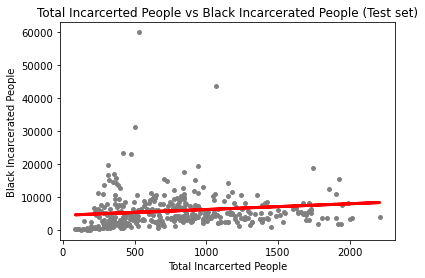

In [123]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Total Incarcerted People vs Black Incarcerated People (Test set)')
plot_test.xlabel('Total Incarcerted People')
plot_test.ylabel('Black Incarcerated People')
plot_test.show()

The line doesn't fit data.

### 7. Create objects that contain the model summary statistics

In [124]:
# Mean squared error
rmse = mean_squared_error(y_test, y_predicted)

# R2 score. 
r2 = r2_score(y_test, y_predicted) 

In [125]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.75693474]]
Mean squared error:  28522944.029274844
R2 score:  -0.004586875862267359


##### Slope -  very slight positive relationship 
#####  MSE is large which means that Total Population isn't a good predictor of Black Population
##### R2 - model is not a good fit

In [126]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,5123.48,4942.660890
1,13729.45,5109.148026
2,1197.08,6588.961447
3,3541.52,5300.109263
4,6287.75,6035.474297
5,9911.46,5923.258875
6,3463.64,6665.827342
7,10929.87,6294.639740
8,6709.09,5789.169616
9,6222.27,6117.224470


### 8. Conclusion 

### This comparison shows strongly that the total incarcerated population does not predict  black incarcerated population

##### Bias: It's hard to know how using state averages to fill in counties that didn't report affected the numbers.  Also, the facilities reported most of the numbers, which might allow for bias.